## Cargar y Preparar Datos


Cargar el conjunto de datos Iris de scikit-learn, explorar su estructura básica, dividir los datos en conjuntos de entrenamiento y prueba (80/20) y escalar las características utilizando StandardScaler para optimizar el rendimiento del modelo.


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. y 4. Inicializar StandardScaler
scaler = StandardScaler()

# 5. Ajustar el escalador y transformar los datos de entrenamiento y prueba
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Iris dataset loaded, split into training and test sets, and features scaled.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Iris dataset loaded, split into training and test sets, and features scaled.
Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


## Entrenar Modelo de Regresión Logística


Inicializar y entrenar un modelo de Regresión Logística con los datos de entrenamiento escalados (X_train, y_train), asegurando la reproducibilidad con un random_state.


In [7]:
from sklearn.linear_model import LogisticRegression

# 1. Inicializar el modelo de Regresión Logística con random_state para reproducibilidad
model = LogisticRegression(random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento escalados
model.fit(X_train, y_train)

print("Logistic Regression model initialized and trained successfully.")

Logistic Regression model initialized and trained successfully.


## Evaluar el Modelo


Realizar predicciones en el conjunto de prueba (X_test) y evaluar el rendimiento del modelo utilizando métricas clave como la precisión, el informe de clasificación con las etiquetas correctas y la matriz de confusión.


In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 2. Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# 3. Generar el informe de clasificación
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# 4. Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# 5. Imprimir los resultados
print(f"Precisión del modelo: {accuracy:.4f}")
print("\nInforme de Clasificación:\n")
print(class_report)
print("\nMatriz de Confusión:\n")
print(cm)

Precisión del modelo: 0.9333

Informe de Clasificación:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Matriz de Confusión:

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


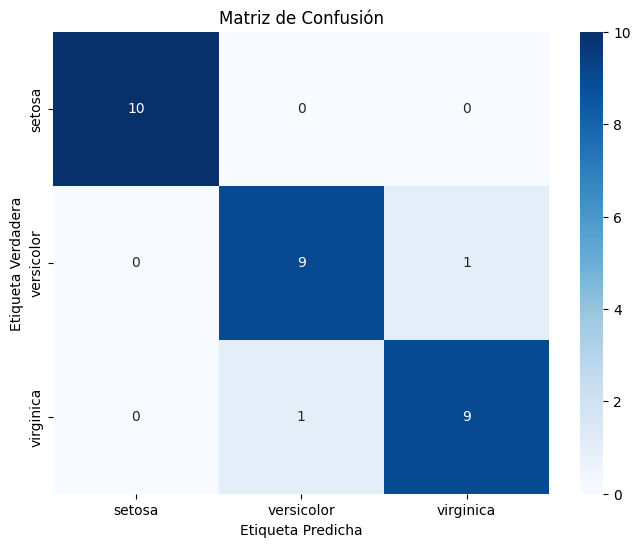

Matriz de Confusión visualizada.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

print("Matriz de Confusión visualizada.")

## Resumen:

### Hallazgos Clave del Análisis de Datos

*   El conjunto de datos Iris se cargó con éxito, se dividió en conjuntos de entrenamiento (80%) y prueba (20%), y sus características se escalaron utilizando `StandardScaler`. El conjunto de entrenamiento comprendía 120 muestras con 4 características, y el conjunto de prueba tenía 30 muestras con 4 características.
*   Se inicializó y entrenó un modelo de Regresión Logística con los datos de entrenamiento escalados.
*   El modelo de Regresión Logística entrenado logró una alta precisión de 0.9333 en el conjunto de prueba.
*   El informe de clasificación reveló un excelente rendimiento en todas las clases:
    *   La clase **Setosa** mostró una precisión, recall y puntuación F1 perfectas de 1.00.
    *   Las clases **Versicolor** y **Virginica** tuvieron una precisión, recall y puntuación F1 de 0.90.
*   La matriz de confusión indicó los siguientes resultados de clasificación:
    *   Las 10 instancias de 'setosa' fueron clasificadas correctamente.
    *   9 instancias de 'versicolor' fueron clasificadas correctamente, pero 1 fue mal clasificada como 'virginica'.
    *   9 instancias de 'virginica' fueron clasificadas correctamente, pero 1 fue mal clasificada como 'versicolor'.
*   Se generó con éxito una visualización de mapa de calor de la matriz de confusión, proporcionando una representación visual clara del rendimiento del modelo.

### Conclusiones o Próximos Pasos

*   El modelo de Regresión Logística demostró un sólido rendimiento en el conjunto de datos Iris, clasificando eficazmente las diferentes especies. Las pequeñas clasificaciones erróneas entre 'versicolor' y 'virginica' son comunes dada la similitud de sus características.
*   Considera explorar algoritmos de clasificación más avanzados, como las Máquinas de Vectores de Soporte o los Bosques Aleatorios, para potencialmente mejorar la distinción entre las clases 'versicolor' y 'virginica' y lograr una precisión aún mayor.